Strategy 2: k and initial points
For k=2, Loss=1921.033485856206, Centroids=[[5.00056234 2.48542748]
 [4.85261193 7.27164171]]
Strategy 2: k and initial points
For k=3, Loss=1293.7774523911348, Centroids=[[2.56146449 6.08861338]
 [5.47740039 2.25498103]
 [6.49724962 7.52297293]]
Strategy 2: k and initial points
For k=4, Loss=805.116645747261, Centroids=[[6.78374609 2.85019999]
 [3.34264769 6.92602803]
 [7.17928621 8.0520791 ]
 [2.85235149 2.28186483]]
Strategy 2: k and initial points
For k=5, Loss=613.2824392056041, Centroids=[[2.60123296 6.91610506]
 [3.21257461 2.49658087]
 [7.75648325 8.55668928]
 [7.25262683 2.40015826]
 [5.40252508 6.73636175]]
Strategy 2: k and initial points
For k=6, Loss=543.0421726617056, Centroids=[[5.33907212 4.46551175]
 [7.29974969 8.41331838]
 [2.68198633 2.09461587]
 [3.15072761 7.12192906]
 [7.98675824 3.01272931]
 [7.05668293 1.33319679]]
Strategy 2: k and initial points
For k=7, Loss=404.44149375514985, Centroids=[[4.81833058 3.6950232 ]
 [7.52874037 

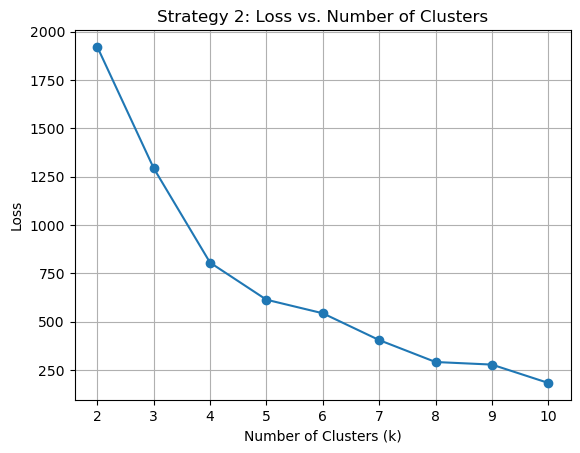

In [8]:
import scipy.io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from random import randrange
import operator

raw_data = scipy.io.loadmat("AllSamples.mat")
data = raw_data["AllSamples"]

id = "6771"

def initial_point_idx2(id,k, N):
    random.seed((id+k))     
    return random.randint(0,N-1)

def average_distance_to_centroids(point, centroids):
    """Compute average distance of a point to all centroids."""
    return np.mean(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))

def initialize_rest_of_centroids(first_centroid, k):
    """Get k centroids with the modified K-means++ approach."""
    centroids = [first_centroid]
    
    for _ in range(1, k):
        avg_distances = np.array([average_distance_to_centroids(point, centroids) for point in data])
        new_centroid = data[np.argmax(avg_distances)]
        centroids.append(new_centroid)
        
    return np.array(centroids)


def kmeans(data, initial_centroids):
    k = initial_centroids.shape[0]
    centroids = np.copy(initial_centroids)
    prev_labels = np.zeros(data.shape[0])
    labels = np.zeros(data.shape[0])
    
    while True:
        # Assign each data point to the closest centroid
        for i, point in enumerate(data):
            distances = np.linalg.norm(point - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Re-calculate centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            # Check if any data point is assigned to the centroid
            if np.sum(labels == i) == 0:  # Empty cluster
                # Reinitialize the centroid randomly from the data points
                new_centroids[i] = data[np.random.choice(data.shape[0])]
            else:
                new_centroids[i] = data[labels == i].mean(axis=0)

        # Break condition: Check if centroids have stopped moving
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids.copy()

    return centroids, labels


def compute_loss(data, centroids, labels):
    """Compute the K-means loss."""
    return np.sum([np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(centroids.shape[0])])

def initial_S2(id, k):
    print("Strategy 2: k and initial points")
    i = int(id) % 150
    random.seed(i + 800)
    init_idx = initial_point_idx2(i, k, data.shape[0])
    init_s= data[init_idx, :]
    return init_s

# def initial_S2(id):
#     print("Strategy 2: k and initial points")
#     i = int(id) % 150
#     random.seed(i + 800)
#     k1 = 4
#     k2 = 6
#     init_idx2 = initial_point_idx2(i, k1, data.shape[0])
#     init_s1 = data[init_idx2, :]
#     init_idx2 = initial_point_idx2(i, k2, data.shape[0])
#     init_s2 = data[init_idx2, :]
#     return k1, init_s1, k2, init_s2

# k1, init_s1, k2, init_s2 = initial_S2(1284) 
# print(f"For k={k1}, first_centroid={init_s1}, k2={k2}, first_centroid={init_s2}")

# initial_centroids_4 = initialize_rest_of_centroids(init_s1, k1)
# final_centroids_4, labels_4 = kmeans(data, initial_centroids_4)
# loss_4 = compute_loss(data, final_centroids_4, labels_4)

# initial_centroids_6 = initialize_rest_of_centroids(init_s2, k2)
# final_centroids_6, labels_6 = kmeans(data, initial_centroids_6)
# loss_6 = compute_loss(data, final_centroids_6, labels_6)

# print(f"For k=4, final centroids are:\n{final_centroids_4}\nLoss: {loss_4}\n")
# print(f"For k=6, final centroids are:\n{final_centroids_6}\nLoss: {loss_6}")

results = {}
losses = []
max_k=10
ks = list(range(2, max_k + 1))

for k in range(2, 11):
    init_s= initial_S2(id, k)
    initial_centroids = initialize_rest_of_centroids(init_s, k)
    final_centroids, labels = kmeans(data, initial_centroids)
    loss = compute_loss(data, final_centroids, labels)
    losses.append(loss)
    results[k] = {"centroids": final_centroids, "labels": labels, "loss": loss}
    print(f"For k={k}, Loss={loss}, Centroids={final_centroids}")
    # Visualization
    # plt.figure(figsize=(10, 7))
    # for i in range(k):
    #     cluster_data = data[labels == i]
    #     plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i + 1}")
    # plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
    # plt.title(f"K-means Clustering for k={k}")
    # plt.xlabel("X-coordinate")
    # plt.ylabel("Y-coordinate")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

plt.plot(ks, losses, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Loss')
plt.title('Strategy 2: Loss vs. Number of Clusters')
plt.grid(True)
plt.show()

In [10]:
import matplotlib.pyplot as plt
#print(data[0])

#print(initial_centers)
initial_centers= {2: [1.92561853, 2.73857632], 3: [4.40450545, 6.75422193], 4: [7.12751003, 1.23747391], 5: [2.40998489, 7.99174945], 6: [2.97661653, 6.01021497], 7: [2.04945194, 2.75937105], 8: [7.44472802, 2.41849318], 9: [8.36230458, 3.08961725], 10: [4.80754093, 3.03464954]}
print(initial_centers)

def kMeans(data, k, points):
    plt.scatter([x[0] for x in data], [y[1] for y in data])
    for i in range(0,k):
        plt.scatter(points[i][0], points[i][1], label=f"c{i}")
    plt.legend()
    plt.show()

#kMeans(data, 3, initial_centers[3]) #displays centroid values on graph

def myKMeans(data, k, points):
    points2 = points.copy()
    iteration = 0
    c = {}

    for i in range(0,k):
        c[f"c{i}"] = points2[i]

    while True:
        iteration += 1
        cp = {}
        for key in c:
            cp[key] = list()

        for i in range(0,len(data)):
            distances = []
            for key, val in c.items():
                diff = abs(np.subtract(data[i],val))
                distances.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
            cp[f"c{np.argmin(distances)}"].append(data[i])

        c2 = {}
        for key, val in cp.items():
            c2[key] = np.array([np.mean([x[0] for x in cp[key]]), np.mean([x[1] for x in cp[key]])])

        tot = 0
        for key,v in c.items():
            if(c[key].tolist() == c2[key].tolist()):
                tot += 1
        if(tot == k):
            return [x for x in c2.values()]
        else:
            c = c2

m = 2
myArr = []
news = myKMeans(data, m, initial_centers[m])
print(news[0])
#kMeans(data, m, news)
#m=2  [[4.85261193, 7.27164171],[5.00056234, 2.48542748]]
while m<11:
   news = myKMeans(data, m, initial_centers[m])
   #myArr.append(news)
   mL = []
   for x in range(len(news)):
    mL2 = []
    mL2.append(news[x][0])
    mL2.append(news[x][1])
    mL.append(mL2)
   myArr.append(mL)
   m += 1
print(myArr)
 

def loss_function(data, k, points):
    c = {}  
    for i in range(0,k):
        c[f"c{i}"] = points[i]
    c2 = {}
    for key in c:
            c2[key] = 0
    for i in range(0,len(data)):
        distan = []
        for key, val in c.items():
            diff = abs(numpy.subtract(data[i],val))
            distan.append(np.sqrt((diff[0] **2) + (diff[1] **2)))
        c2[f"c{np.argmin(distan)}"] += (min(distan)) ** 2
    return sum(c2.values())
    
q = 2
lfList = []
while q<11:
 myLoss = loss_function(data, q, myKMeans(data, q, initial_centers[q]))
 lfList.append(myLoss)
 #print(myLoss)
 q += 1
#print(loss_function(data, q, myKMeans(data, q, initial_centers[q])))
print(lfList)


{2: [1.92561853, 2.73857632], 3: [4.40450545, 6.75422193], 4: [7.12751003, 1.23747391], 5: [2.40998489, 7.99174945], 6: [2.97661653, 6.01021497], 7: [2.04945194, 2.75937105], 8: [7.44472802, 2.41849318], 9: [8.36230458, 3.08961725], 10: [4.80754093, 3.03464954]}


AttributeError: 'float' object has no attribute 'tolist'

In [ ]:
kMeans(data, 10, initial_centers[10])

In [89]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = scipy.io.loadmat("AllSamples.mat")
data = raw_data["AllSamples"]


id = "6771"
initial_centers= {2: [[7.45225989, 2.26860809],
       [7.39015357, 1.13206806]], 3: [[7.52963009, 8.79617112],
       [1.20162248, 7.68639714],
       [7.1712312 , 5.16316266]], 4: [[2.78903847, 6.44350728],
       [3.89523379, 0.70718356],
       [4.96433498, 7.88753239],
       [2.33338702, 7.23913284]], 5: [[2.58046907, 6.53023549],
       [1.81229618, 3.40781697],
       [2.0614632 , 8.22584366],
       [1.51180219, 7.48293717],
       [7.25412082, 2.77862318]], 6: [[1.76496239, 6.98004057],
       [7.06572   , 2.08940967],
       [6.99180377, 5.7932428 ],
       [5.01728788, 3.76311975],
       [2.25790845, 7.44778003],
       [7.57805025, 3.82487017]], 7: [[4.7585105 , 8.24317459],
       [2.3085098 , 7.39324133],
       [2.73285832, 2.83024707],
       [8.21897526, 8.9510505 ],
       [2.14633887, 8.83030888],
       [2.48989693, 8.40047863],
       [5.33498937, 3.07430754]], 8: [[6.2091503 , 6.16038763],
       [3.2881521 , 0.71796855],
       [3.54461267, 0.94261882],
       [3.72610844, 5.20432439],
       [4.6733967 , 7.14753742],
       [2.06136024, 3.54047797],
       [4.4280969 , 7.41377907],
       [8.00706441, 2.77531997]], 9: [[ 4.05095774,  4.05212767],
       [ 2.80096609,  1.03176348],
       [ 1.9311184 ,  6.93692984],
       [ 8.20129386,  9.21291541],
       [ 8.12343078,  2.60762469],
       [ 5.57009665,  8.3870942 ],
       [ 6.76851611,  1.38337541],
       [ 1.79534908,  3.7348206 ],
       [ 6.5807212 , -0.0766824 ]], 10: [[3.53350737, 0.33198894],
       [4.95728696, 6.90897984],
       [5.14167285, 5.71626939],
       [6.12393256, 5.49223251],
       [4.97304553, 7.4290438 ],
       [7.68097556, 0.83542043],
       [7.60284588, 0.778726  ],
       [2.69511302, 5.93967352],
       [7.93432052, 8.17735191],
       [5.04470093, 8.49060119]]}
#print(initial_centers)

X, Y = data[:,0], data[:,1]

In [90]:
dataframe = pd.DataFrame({'F1': data[:, 0], 'F2': data[:, 1]})

In [91]:
def distan(x, y,ax=1):
    return np.linalg.norm(x - y,axis=ax)

In [96]:
lossf=[]
cc=[]

In [98]:
def myKMeans (k): 
    c=initial_centers[k]
    c=np.reshape(c,(k,2))
    c2=np.zeros(c.shape)
    cl = np.zeros(len(data))   
    difference = distan(c, c2, None)

    while difference != 0:
        for i in range(len(data)):
            d = distan(data[i], c)
            cluster = np.argmin(d)
            cl[i] = cluster
        c2 = c.copy()      
        for i in range(k): 
            points = [data[j] for j in range(len(data)) if cl[j] == i]
            c[i] = np.mean(points, axis=0)
        difference = distan(c, c2, None)
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if cl[j] == i])
        ax.scatter(points[:, 0], points[:, 1])
    ax.scatter(c[:, 0], c[:, 1], marker='X', s=500, c='black')
    #print('The Final Centroid values are: ',c)
    cc.append(c)
    data_mod=np.insert(data,2,cl,axis=1)
    dcls=data_mod[data_mod[:,2].argsort(kind='mergesort')]
    dcl=pd.DataFrame({'F1': dcls[:, 0], 'F2': dcls[:, 1],'CL':dcls[:,2]})
    subset={}
    for j in range (0,dcl['CL'].nunique()):
        subset[j]=(dcl[dcl['CL']==j].drop('CL',axis=1)).to_numpy()
    lof=0
    for j in range (0,dcl['CL'].nunique()):
        for k in range (0,len(subset[j])):
            lof+=math.pow(distan(c[j],subset[j][k], None),2)
    lossf.append(lof)
    #print('The Loss Function is: ',lossf)

[array([[4.85261193, 7.27164171],
       [5.00056234, 2.48542748]]), array([[6.49724962, 7.52297293],
       [2.56146449, 6.08861338],
       [5.47740039, 2.25498103]]), array([[3.24285347, 2.55197905],
       [7.25262683, 2.40015826],
       [6.57957643, 7.57333595],
       [2.8337661 , 6.9189569 ]]), array([[5.29629878, 6.64908797],
       [3.21257461, 2.49658087],
       [7.75648325, 8.55668928],
       [2.51976116, 7.02028909],
       [7.25262683, 2.40015826]]), array([[2.60123296, 6.91610506],
       [6.84098911, 1.62181557],
       [7.75648325, 8.55668928],
       [3.31343247, 2.54034856],
       [5.37094104, 6.76445459],
       [7.93154423, 3.16113997]]), array([[5.46427736, 6.83771354],
       [3.47882287, 3.48528838],
       [3.14506148, 0.90770655],
       [7.75648325, 8.55668928],
       [2.18321462, 7.70355341],
       [3.13834768, 5.93372322],
       [7.41419243, 2.32169114]]), array([[7.91430998, 8.51990981],
       [3.44650803, 0.47784504],
       [2.69805343, 2.0242299 

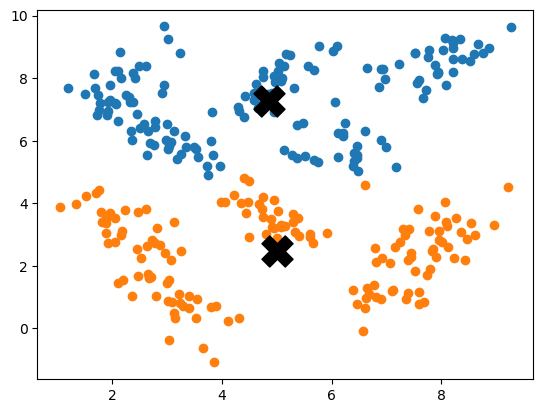

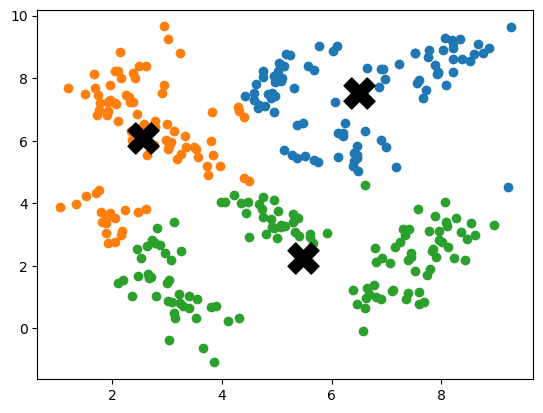

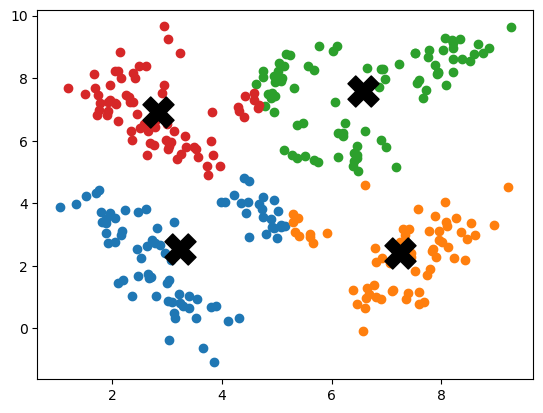

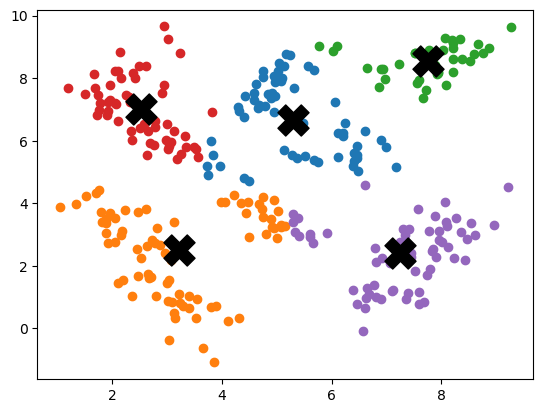

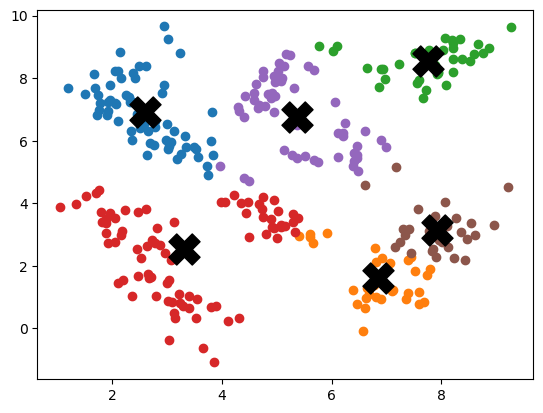

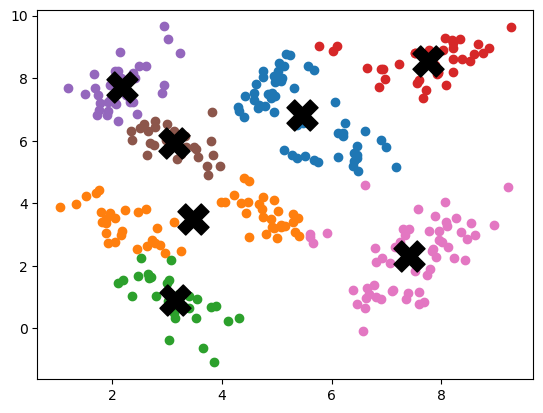

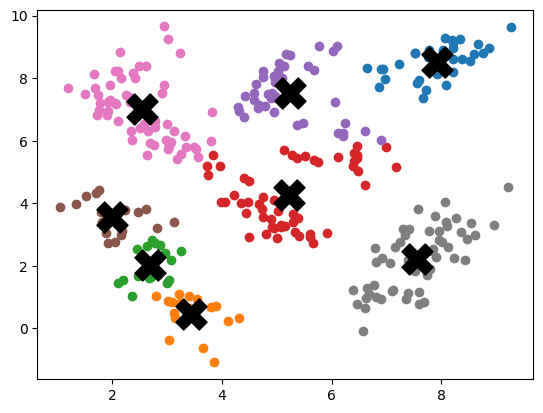

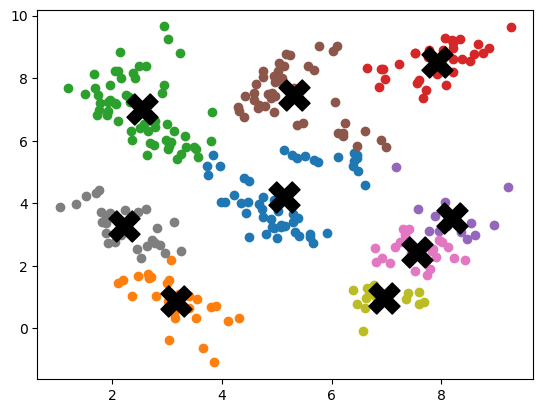

In [99]:
for x in range(2,10):
    myKMeans(x)
    
print(cc)